In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("D:/Downloads/HousingData.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
df['CRIM'].fillna(value=df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(value=df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(value=df['INDUS'].mean(),inplace=True)
df['CHAS'].fillna(value=df['CHAS'].mean(),inplace=True)
df['AGE'].fillna(value=df['AGE'].mean(),inplace=True)
df['LSTAT'].fillna(value=df['LSTAT'].mean(),inplace=True)

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

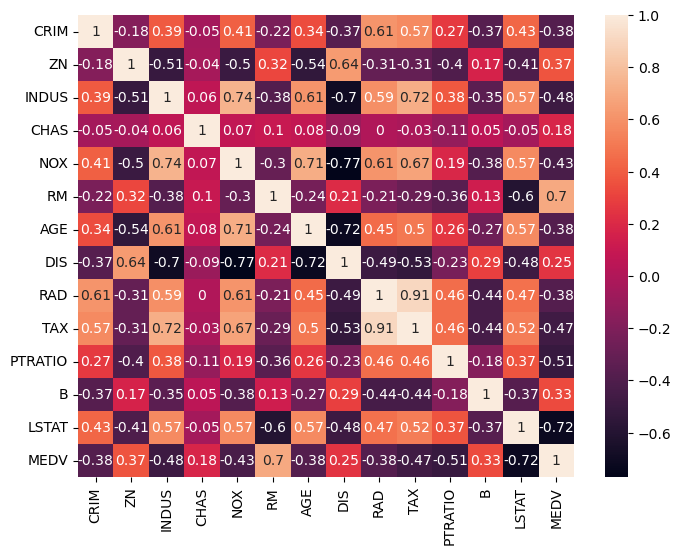

In [9]:
plt.figure(figsize=(8,6))
cm=df.corr().round(2)
sns.heatmap(data=cm,annot=True)

C:\Users\shris\AppData\Local\Temp\ipykernel_11808\31891213.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'],bins=30)


<Axes: xlabel='MEDV', ylabel='Density'>

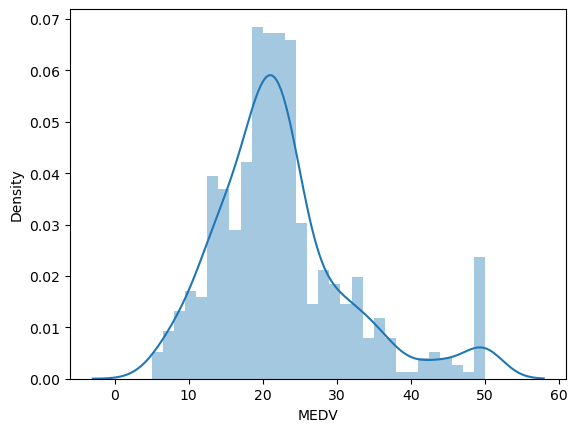

In [10]:
sns.distplot(df['MEDV'],bins=30)

In [11]:
from sklearn.model_selection import train_test_split
x=df.iloc[:,df.columns!='MEDV']
y=df.loc[:,"MEDV"]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [14]:
model=Sequential()
model.add(Dense(units=512,input_shape=(13,),activation='relu'))
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='relu'))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 179713 (702.00 KB)
Trainable params: 179713 (702.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
history=model.fit(X_train,Y_train,epochs=10,validation_split=0.5)

Epoch 1/10
6/6 [==============================] - 1s 33ms/step - loss: 504.4976 - mae: 19.9079 - val_loss: 160.8447 - val_mae: 9.8288
Epoch 2/10
6/6 [==============================] - 0s 8ms/step - loss: 141.5307 - mae: 9.1501 - val_loss: 92.4558 - val_mae: 6.8149
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 88.6597 - mae: 6.8965 - val_loss: 57.3466 - val_mae: 5.6946
Epoch 4/10
6/6 [==============================] - 0s 10ms/step - loss: 60.3118 - mae: 5.6707 - val_loss: 45.7520 - val_mae: 4.6812
Epoch 5/10
6/6 [==============================] - 0s 12ms/step - loss: 61.4071 - mae: 5.5934 - val_loss: 42.8071 - val_mae: 4.4701
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 41.9007 - mae: 4.5039 - val_loss: 39.7301 - val_mae: 4.5009
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 45.3950 - mae: 4.6970 - val_loss: 36.6272 - val_mae: 4.2573
Epoch 8/10
6/6 [==============================] - 0s 12ms/step - loss: 35.2507 - 

In [17]:
mse,mae=model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 5ms/step - loss: 31.4051 - mae: 3.8088


In [18]:

mae

3.8087687492370605

In [19]:
mse

31.40509033203125

In [20]:
y_pred=model.predict(x=X_test)

5/5 [==============================] - 0s 3ms/step


In [21]:
print(*zip(y_pred,Y_test))

(array([10.673982], dtype=float32), 15.0) (array([26.303799], dtype=float32), 26.6) (array([35.619698], dtype=float32), 45.4) (array([14.225379], dtype=float32), 20.8) (array([34.722397], dtype=float32), 34.9) (array([33.43007], dtype=float32), 21.9) (array([26.622017], dtype=float32), 28.7) (array([9.699726], dtype=float32), 7.2) (array([20.582226], dtype=float32), 20.0) (array([35.565174], dtype=float32), 32.2) (array([31.72789], dtype=float32), 24.1) (array([21.850227], dtype=float32), 18.5) (array([14.972582], dtype=float32), 13.5) (array([27.935143], dtype=float32), 27.0) (array([16.710566], dtype=float32), 23.1) (array([25.004086], dtype=float32), 18.9) (array([19.146559], dtype=float32), 24.5) (array([34.401398], dtype=float32), 43.1) (array([19.72829], dtype=float32), 19.8) (array([14.021477], dtype=float32), 13.8) (array([14.0719795], dtype=float32), 15.6) (array([21.558048], dtype=float32), 50.0) (array([28.863129], dtype=float32), 37.2) (array([37.476776], dtype=float32), 46